# ELEN E4903 Homework 1
## Kliment Mamykin UNI 2770

## Problem 1

Given a sequence of N observations $X = (x_1,\dotsc,x_N)$ where $x_i \stackrel{iid}{\sim} Bern(\pi)$, with p.d.f 

\begin{equation}
\tag{1} 
p(x_i|\pi) = \pi^{x_i} (1 − \pi)^{1−x_i}
\end{equation}

### (a) What is the likelihood of the data $(x_1,\dotsc,x_N)$?

The likelihood of data given parameters of the model (in the case of $Bern(\pi)$ the parameter is a single value $\pi$) is:

\begin{equation}
\newcommand\given[1][]{\,#1\vert\,}
\end{equation}

\begin{equation}
\tag{2}
p(X \given \pi) = p(x_1,\dotsc,x_N | \pi) = \prod_{i=1}^{N} \pi^{x_i} (1 − \pi)^{1−x_i}
\end{equation}

Where the assumption that the observations are independent allow factorization of the joint distribution into a product of individual observation probabilities.


### (b) Maximum likelihood estimate $\hat{\pi}_{ml}$ for $\pi$

Maximum likelihood estimate $\hat{\pi}_{ml}$ is defined as 

\begin{equation}
\tag{3}
\hat{\pi}_{ml} = \arg \max_{\pi} \log p(X \given \pi)
\end{equation}

Here $\hat{\pi}_{ml}$ is a point estimate (a scalar), and $X$ is treated as a r.v.. We are selecting a value $\pi$ that maximizes the log probability of data given model parameters. For the given model ($x_i \sim Bern(\pi)$) 

\begin{align}
\hat{\pi}_{ml} &= \arg \max_{\pi} \log p(x_1,\dotsc,x_N \given \pi) \\
&= \arg \max_{\pi} \log \prod_{i=1}^{N} \pi^{x_i} (1 − \pi)^{1−x_i} \\
&= \arg \max_{\pi} \log \left( \pi^{\sum_{i=1}^{N} x_i} (1 − \pi)^{\sum_{i=1}^{N} (1−x_i)} \right) \\
&= \arg \max_{\pi} \sum_{i=1}^{N} x_i \log \pi + \sum_{i=1}^{N} (1−x_i) \log (1 − \pi) 
\tag{4}
\end{align}

To find a maximunm of a function, we take a gradient with respect to the parameters of maximization, and find a point where the gradient is 0.

\begin{align}
0 &= \frac{d}{d\pi} \left( \sum_{i=1}^{N} x_i \log \pi + \sum_{i=1}^{N} (1−x_i) \log (1 − \pi) \right) \Big|_{\hat{\pi}_{ml}} \\
&= \frac{\sum_{i=1}^{N} x_i}{\hat{\pi}_{ml}} - \frac{\sum_{i=1}^{N} (1−x_i)}{1 − \hat{\pi}_{ml}} \Rightarrow \tag{5} \\
\hat{\pi}_{ml} &= \frac{\sum_{i=1}^{N} x_i}{\sum_{i=1}^{N} x_i + \sum_{i=1}^{N} (1−x_i)} = \frac{\sum_{i=1}^{N} x_i}{N} 
\tag{6}
\end{align}

### (c) Maximum a posteriori (MAP) estimate $\hat{\pi}_{MAP}$ for $\pi$

MAP estimate $\hat{\pi}_{MAP}$ is defined as

\begin{equation}
\hat{\pi}_{MAP} = \arg \max_{\pi} \log p(\pi \given X)
\tag{7}
\end{equation}

Here we consider a conditional distribution of parameters of the model, treated as a r.v. conditioned on the data $X$. $X$ generally is also treated as a r.v. but for conditioning we pick one random instantiation of the dataset. MAP estimate estimates the mode in the posterior distribution, a point with the highest density. Depending on the form of the posterior the mode may or may not be the same as the mean. Using Bayes formula we express the posterior through the likelihood, the prior and the data evidence, plug in likelihood of $Bern(\pi)$ and the prior pdf of $Beta(\alpha, \beta)$.

\begin{align}
\hat{\pi}_{MAP} &= \arg \max_{\pi} \log \frac{p(X \given \pi)p(\pi)}{p(X)} \\
&= \arg \max_{\pi} \log p(X \given \pi) + \log p(\pi) - \log p(X) \\
&= \arg \max_{\pi} \log \prod_{i=1}^{N} \pi^{x_i} (1 − \pi)^{1−x_i} + \log C \pi^{\alpha-1} (1 - \pi)^{\beta - 1} - \log p(X) \\
&= \arg \max_{\pi} \left((\sum_{i=1}^{N} x_i + \alpha - 1) \log \pi + (\sum_{i=1}^{N} (1−x_i) + \beta - 1) \log (1 − \pi) + \log C - \log p(X) \right)
\tag{8}
\end{align}

\begin{align}
0 &= \frac{d}{d\pi} \left( (\sum_{i=1}^{N} x_i + \alpha - 1) \log \pi + (\sum_{i=1}^{N} (1−x_i) + \beta - 1) \log (1 − \pi) \right) \Big|_{\hat{\pi}_{MAP}} \\
&= \frac{\sum_{i=1}^{N} x_i + \alpha - 1}{\hat{\pi}_{MAP}} - \frac{\sum_{i=1}^{N} (1−x_i) + \beta - 1}{1 − \hat{\pi}_{MAP}}
\tag{9}
\end{align}

\begin{equation}
\hat{\pi}_{MAP} = \frac{\sum_{i=1}^{N} x_i + \alpha - 1}{\sum_{i=1}^{N} x_i + \alpha - 1 + \sum_{i=1}^{N} (1−x_i) + \beta - 1} = \frac{\sum_{i=1}^{N} x_i + \alpha - 1}{N + \alpha + \beta - 2}
\tag{10}
\end{equation}

$\hat{\pi}_{MAP}$ becomes $\hat{\pi}_{ml}$ when $\alpha = \beta = 1$

### (d) Posterior distribution of $\pi$

\begin{align}
x_i \sim Bernoulli(\pi) &\Rightarrow p(X \given \pi) = \prod_{i=1}^{N} \pi^{x_i} (1 − \pi)^{1−x_i} \\
\pi \sim Beta(\alpha, \beta)  &\Rightarrow p(\pi) = C \pi^{\alpha-1} (1 - \pi)^{\beta - 1} \\
p(\pi \given X) &= \frac{p(X \given \pi) p(\pi)}{p(X)} \propto \pi^{\sum_{i=1}^{N} x_i + \alpha - 1} (1 - \pi)^{\sum_{i=1}^{N} (1−x_i) + \beta - 1} \Rightarrow \\
p(\pi \given X) &= Beta(\alpha', \beta') \qquad \alpha'= \sum_{i=1}^{N} x_i + \alpha \quad \beta' = \sum_{i=1}^{N} (1−x_i) + \beta
\tag{11}
\end{align}

An interpretation of (11) is that the parameters of the prior encode one's statistics on the number of successes ($\alpha$) and failues ($\beta$) seen (or believed to be seen) so far, also called _pseudo observations_. And the parameters of the posterior represent an updated belief of the number of success ($\alpha'$) and failues ($\beta'$) after seeing more data.

Distribution families sich that when multiplied by a likelihood function produce a re-parameterized distribution from the same family are called conjugate priors. As shown in (11) $Beta(\alpha, \beta)$ is a conjugate prior to $Bern(\pi)$ likelihood. Some other examples: Gaussian distribution is a conjugate prior for the mean in a Gaussian likelihood, Gamma is a prior for Gaussian precision parameter [3].


### (e) Mean and variance of $\pi$ under posterior distribution, relationship to $\hat{\pi}_{MAP}$ and $\hat{\pi}_{ml}$

From (11) we have that posterior $p(\pi) \sim Beta(\alpha', \beta')$ from which follows (using Beta distribution mean and variance from [2])

\begin{align}
E[\pi] &= \frac{\alpha'}{\alpha'+\beta'}\\
Var[\pi] &= \frac{\alpha'\beta'}{(\alpha'+\beta')^2(\alpha'+\beta'+1)}
\tag{12}
\end{align}

Calculate $E(\hat{\pi}_{ml})$ and $Var(\hat{\pi}_{ml})$ from (6) considering linearity of expectation of a sum of r.v.'s $E(\sum_{i=1}^{N} a_i X_i) = \sum_{i=1}^{N} a_i E[X_i]$ and for independent r.v.s $Var(\sum_{i=1}^{N} a_i X_i + b) = \sum_{i=1}^{N} a_i^2 Var[X_i]$ and $Var(X \sim Bern(\pi)) = \pi(1-\pi)$

\begin{align}
E[\hat{\pi}_{ml}] &= E\left[\frac{\sum_{i=1}^{N} x_i}{N}\right] = \frac{\sum_{i=1}^{N} E[x_i]}{N} = \frac{N\pi}{N} = \pi
\tag{13}
\end{align}

from which we can conclude that $E[\hat{\pi}_{ml}]$ is an unbiased estimate of $\pi$ with variance

\begin{align}
Var[\hat{\pi}_{ml}] &= Var\left[\frac{\sum_{i=1}^{N} x_i}{N}\right] = \frac{1}{N^2}\sum_{i=1}^{N} Var[x_i] = \frac{1}{N^2} N \pi(1-\pi) = \frac{1}{N} \pi(1-\pi)
\tag{14}
\end{align}

And the same calculations for $\hat{\pi}_{MAP}$ yield:

\begin{align}
E[\hat{\pi}_{MAP}] &= E\left[ \frac{\sum_{i=1}^{N} x_i + \alpha - 1}{N + \alpha + \beta - 2} \right]= \frac{\sum_{i=1}^{N} E[x_i] + \alpha - 1}{N + \alpha + \beta - 2}
= \frac{N\pi + \alpha - 1}{N + \alpha + \beta - 2}
= \frac{\pi + \frac{\alpha-1}{N}}{1+\frac{\alpha + \beta - 2}{N}}
\tag{15}
\end{align}

indicating that $E[\hat{\pi}_{MAP}]$ in a biased estimate of $\pi$ with variance

\begin{align}
Var[\hat{\pi}_{MAP}] 
&= Var\left[ \frac{\sum_{i=1}^{N} x_i + \alpha - 1}{N + \alpha + \beta - 2} \right] 
= \frac{1}{(N + \alpha + \beta - 2)^2} \sum_{i=1}^{N} Var[x_i]
= \frac{N}{(N + \alpha + \beta - 2)^2} \pi(1-\pi)
= \frac{1}{N(1 + \frac{\alpha + \beta - 2}{N})^2} \pi(1-\pi)
\tag{16}
\end{align}


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from hw1 import regression

In [2]:
X_train, y_train, X_test, y_test = regression.load_data('hw1/hw1-data')
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(350, 7)
(350, 1)
(42, 7)
(42, 1)


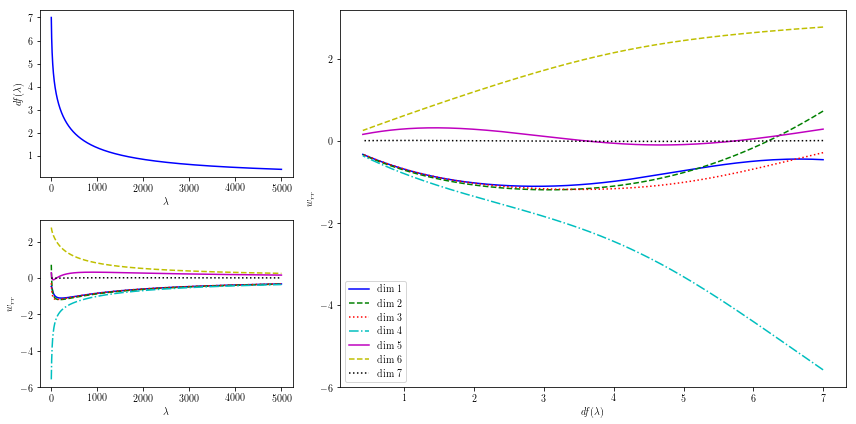

In [5]:
regression.part1a()

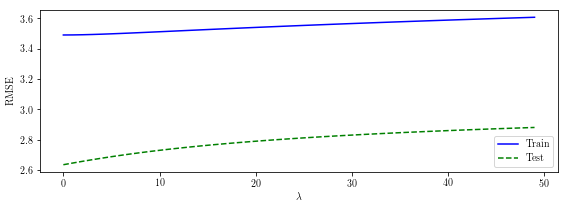

In [8]:
regression.part1c()

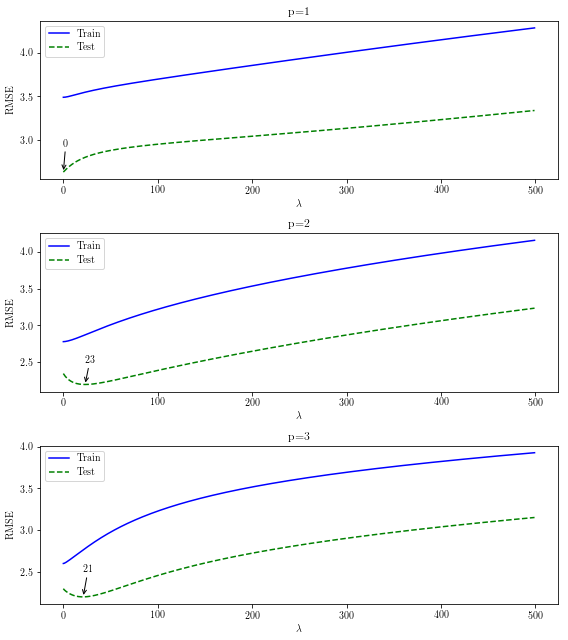

In [7]:
regression.part2a()

## References

1. Lars Buitinck et all, "API design for machine learning software:
experiences from the scikit-learn project", https://arxiv.org/pdf/1309.0238.pdf
2. Beta Distribution, Wikipedia, https://en.wikipedia.org/wiki/Beta_distribution
3. Conjugate Prior, Wikipedia, https://en.wikipedia.org/wiki/Conjugate_prior

/Users/kmamykin/anaconda3/envs/hearts/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


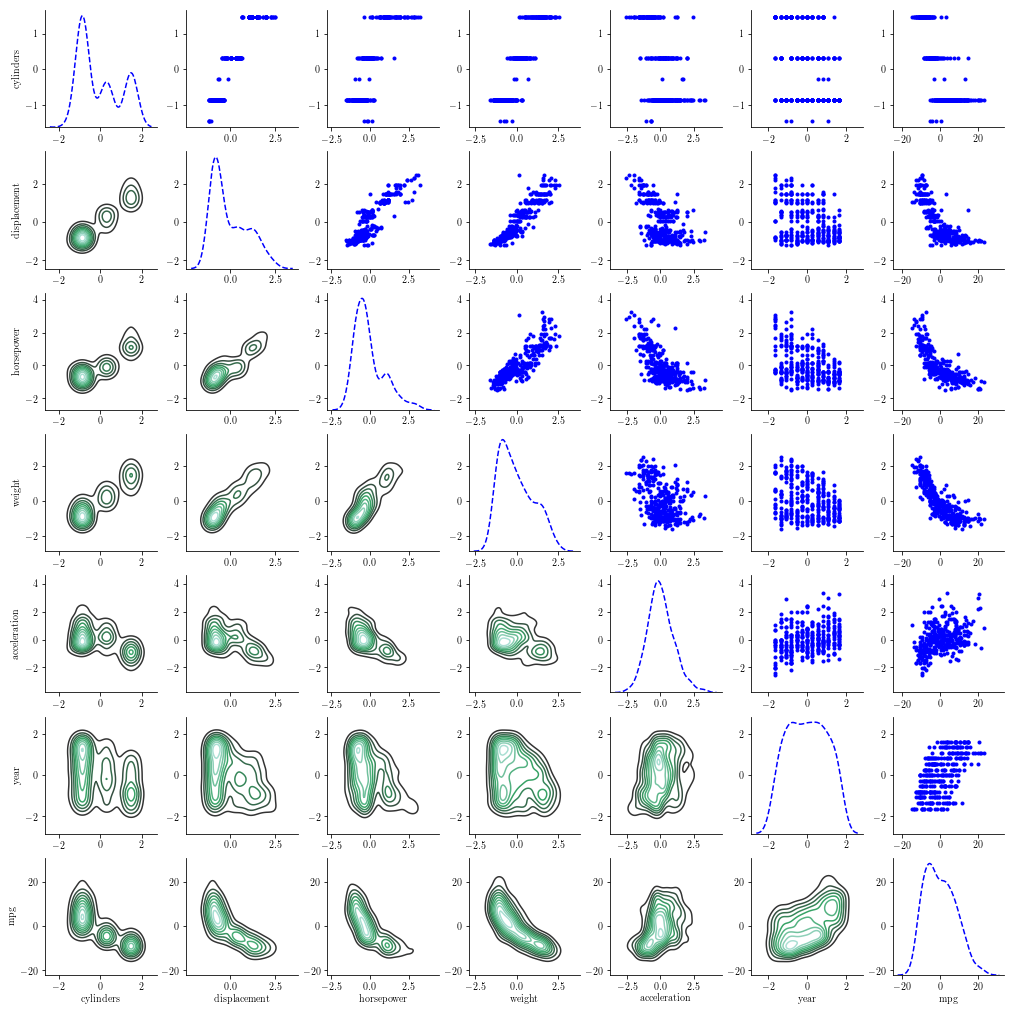

In [3]:
regression.pairplot(regression.make_dataframe(X_train, y_train))


/Users/kmamykin/anaconda3/envs/hearts/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


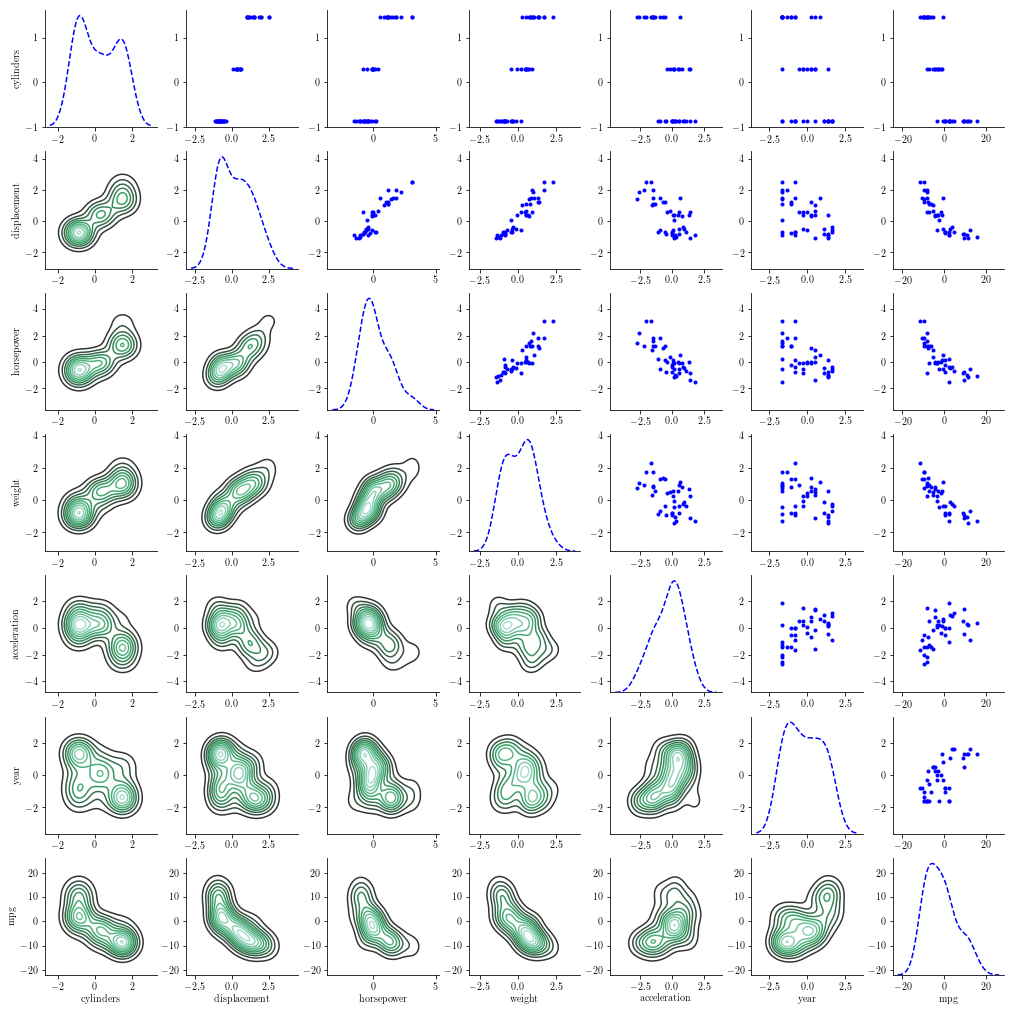

In [4]:
regression.pairplot(regression.make_dataframe(X_test, y_test))
